In [21]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                           balanced_accuracy_score, f1_score, precision_score, recall_score)
from sklearn.preprocessing import StandardScaler
import joblib



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, confusion_matrix

# Advanced ML libraries
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
except ImportError:
    XGBOOST_AVAILABLE = False
    print("XGBoost not available. Install with: pip install xgboost")

try:
    import lightgbm as lgb
    LIGHTGBM_AVAILABLE = True
except ImportError:
    LIGHTGBM_AVAILABLE = False
    print("LightGBM not available. Install with: pip install lightgbm")

# Explainability
try:
    import shap
    SHAP_AVAILABLE = True
except ImportError:
    SHAP_AVAILABLE = False
    print("SHAP not available. Install with: pip install shap")

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"XGBoost available: {XGBOOST_AVAILABLE}")
print(f"LightGBM available: {LIGHTGBM_AVAILABLE}")
print(f"SHAP available: {SHAP_AVAILABLE}")


Libraries imported successfully!
XGBoost available: True
LightGBM available: True
SHAP available: True


In [22]:
# Load preprocessed datasets
print("LOADING PREPROCESSED DATA")

try:
    # Load preprocessed datasets
    X_train = pd.read_csv('X_train_scaled.csv')
    X_val = pd.read_csv('X_val_scaled.csv')
    X_test = pd.read_csv('X_test_scaled.csv')
    
    y_train = pd.read_csv('y_train.csv').squeeze()
    y_val = pd.read_csv('y_val.csv').squeeze()
    y_test = pd.read_csv('y_test.csv').squeeze()
    ### The .squeeze() method removes dimensions of size 1, converting a DataFrame to a Series
    ### The .squeeze() method is a clean, robust way to ensure your target variables are in the correct 1D format that sklearn expects, 
    ### preventing potential errors during model training and evaluation.
    
    # Load preprocessing objects
    scaler = joblib.load('scaler.pkl')
    
    print("...Preprocessed data loaded successfully!!....")
    print(f"Training set: {X_train.shape}")
    print(f"Validation set: {X_val.shape}")
    print(f"Test set: {X_test.shape}")
    
    # Display class distribution
    print("\nClass distribution:")
    print("Training set:")
    print(y_train.value_counts().sort_index())
    print("\nValidation set:")
    print(y_val.value_counts().sort_index())
    print("\nTest set:")
    print(y_test.value_counts().sort_index())
    
        
except FileNotFoundError as e:
    print(f"Error loading preprocessed data: {e}")
    print("Please run the preprocessing notebook first to generate the required files.")
    print("Required files: X_train_scaled.csv, X_val_scaled.csv, X_test_scaled.csv")
    print("                y_train.csv, y_val.csv, y_test.csv")
    print("                scaler.pkl")


LOADING PREPROCESSED DATA
...Preprocessed data loaded successfully!!....
Training set: (300, 57)
Validation set: (100, 57)
Test set: (100, 57)

Class distribution:
Training set:
Sold_Status
0    114
1    186
Name: count, dtype: int64

Validation set:
Sold_Status
0    38
1    62
Name: count, dtype: int64

Test set:
Sold_Status
0    38
1    62
Name: count, dtype: int64


In [23]:

# Store all model results
all_results = []

# ===================== SVM =====================
print("\nSUPPORT VECTOR MACHINE (SVM) MODEL")
svm_model = SVC(
    kernel='rbf',
    probability=True,
    class_weight='balanced',
    random_state=234
)
svm_model.fit(X_train, y_train)

y_train_pred = svm_model.predict(X_train)
y_val_pred = svm_model.predict(X_val)
y_test_pred = svm_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_balanced_acc = balanced_accuracy_score(y_train, y_train_pred)
val_balanced_acc = balanced_accuracy_score(y_val, y_val_pred)
test_balanced_acc = balanced_accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred, average='macro')
val_f1 = f1_score(y_val, y_val_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

print(f"SVM Performance:")
print(f"Train - Acc: {train_accuracy:.3f}, BalAcc: {train_balanced_acc:.3f}, F1: {train_f1:.3f}")
print(f"Val - Acc: {val_accuracy:.3f}, BalAcc: {val_balanced_acc:.3f}, F1: {val_f1:.3f}")
print(f"Test - Acc: {test_accuracy:.3f}, BalAcc: {test_balanced_acc:.3f}, F1: {test_f1:.3f}")

all_results.append({
    'model': 'SVM',
    'train_accuracy': train_accuracy,
    'val_accuracy': val_accuracy,
    'test_accuracy': test_accuracy,
    'train_balanced_acc': train_balanced_acc,
    'val_balanced_acc': val_balanced_acc,
    'test_balanced_acc': test_balanced_acc,
    'train_f1': train_f1,
    'val_f1': val_f1,
    'test_f1': test_f1
})


# ===================== DECISION TREE =====================
print("\nDECISION TREE CLASSIFIER")
tree_model = DecisionTreeClassifier(
    random_state=234,
    class_weight='balanced',
    max_depth=10
)
tree_model.fit(X_train, y_train)

y_train_pred = tree_model.predict(X_train)
y_val_pred = tree_model.predict(X_val)
y_test_pred = tree_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_balanced_acc = balanced_accuracy_score(y_train, y_train_pred)
val_balanced_acc = balanced_accuracy_score(y_val, y_val_pred)
test_balanced_acc = balanced_accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred, average='macro')
val_f1 = f1_score(y_val, y_val_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

print(f"Decision Tree Performance:")
print(f"Train - Acc: {train_accuracy:.3f}, BalAcc: {train_balanced_acc:.3f}, F1: {train_f1:.3f}")
print(f"Val - Acc: {val_accuracy:.3f}, BalAcc: {val_balanced_acc:.3f}, F1: {val_f1:.3f}")
print(f"Test - Acc: {test_accuracy:.3f}, BalAcc: {test_balanced_acc:.3f}, F1: {test_f1:.3f}")

all_results.append({
    'model': 'Decision Tree',
    'train_accuracy': train_accuracy,
    'val_accuracy': val_accuracy,
    'test_accuracy': test_accuracy,
    'train_balanced_acc': train_balanced_acc,
    'val_balanced_acc': val_balanced_acc,
    'test_balanced_acc': test_balanced_acc,
    'train_f1': train_f1,
    'val_f1': val_f1,
    'test_f1': test_f1
})


# ===================== KNN =====================
print("\nK-NEAREST NEIGHBORS (KNN)")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_train_pred = knn_model.predict(X_train)
y_val_pred = knn_model.predict(X_val)
y_test_pred = knn_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_balanced_acc = balanced_accuracy_score(y_train, y_train_pred)
val_balanced_acc = balanced_accuracy_score(y_val, y_val_pred)
test_balanced_acc = balanced_accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred, average='macro')
val_f1 = f1_score(y_val, y_val_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

print(f"KNN Performance:")
print(f"Train - Acc: {train_accuracy:.3f}, BalAcc: {train_balanced_acc:.3f}, F1: {train_f1:.3f}")
print(f"Val - Acc: {val_accuracy:.3f}, BalAcc: {val_balanced_acc:.3f}, F1: {val_f1:.3f}")
print(f"Test - Acc: {test_accuracy:.3f}, BalAcc: {test_balanced_acc:.3f}, F1: {test_f1:.3f}")

all_results.append({
    'model': 'KNN',
    'train_accuracy': train_accuracy,
    'val_accuracy': val_accuracy,
    'test_accuracy': test_accuracy,
    'train_balanced_acc': train_balanced_acc,
    'val_balanced_acc': val_balanced_acc,
    'test_balanced_acc': test_balanced_acc,
    'train_f1': train_f1,
    'val_f1': val_f1,
    'test_f1': test_f1
})


# ===================== GRADIENT BOOSTING =====================
print("\nGRADIENT BOOSTING CLASSIFIER")
gb_model = GradientBoostingClassifier(random_state=234)
gb_model.fit(X_train, y_train)

y_train_pred = gb_model.predict(X_train)
y_val_pred = gb_model.predict(X_val)
y_test_pred = gb_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_balanced_acc = balanced_accuracy_score(y_train, y_train_pred)
val_balanced_acc = balanced_accuracy_score(y_val, y_val_pred)
test_balanced_acc = balanced_accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred, average='macro')
val_f1 = f1_score(y_val, y_val_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

print(f"Gradient Boosting Performance:")
print(f"Train - Acc: {train_accuracy:.3f}, BalAcc: {train_balanced_acc:.3f}, F1: {train_f1:.3f}")
print(f"Val - Acc: {val_accuracy:.3f}, BalAcc: {val_balanced_acc:.3f}, F1: {val_f1:.3f}")
print(f"Test - Acc: {test_accuracy:.3f}, BalAcc: {test_balanced_acc:.3f}, F1: {test_f1:.3f}")

all_results.append({
    'model': 'Gradient Boosting',
    'train_accuracy': train_accuracy,
    'val_accuracy': val_accuracy,
    'test_accuracy': test_accuracy,
    'train_balanced_acc': train_balanced_acc,
    'val_balanced_acc': val_balanced_acc,
    'test_balanced_acc': test_balanced_acc,
    'train_f1': train_f1,
    'val_f1': val_f1,
    'test_f1': test_f1
})


# ===================== NAIVE BAYES =====================
print("\nGAUSSIAN NAIVE BAYES")
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_train_pred = nb_model.predict(X_train)
y_val_pred = nb_model.predict(X_val)
y_test_pred = nb_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_balanced_acc = balanced_accuracy_score(y_train, y_train_pred)
val_balanced_acc = balanced_accuracy_score(y_val, y_val_pred)
test_balanced_acc = balanced_accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred, average='macro')
val_f1 = f1_score(y_val, y_val_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

print(f"Naive Bayes Performance:")
print(f"Train - Acc: {train_accuracy:.3f}, BalAcc: {train_balanced_acc:.3f}, F1: {train_f1:.3f}")
print(f"Val - Acc: {val_accuracy:.3f}, BalAcc: {val_balanced_acc:.3f}, F1: {val_f1:.3f}")
print(f"Test - Acc: {test_accuracy:.3f}, BalAcc: {test_balanced_acc:.3f}, F1: {test_f1:.3f}")

all_results.append({
    'model': 'Naive Bayes',
    'train_accuracy': train_accuracy,
    'val_accuracy': val_accuracy,
    'test_accuracy': test_accuracy,
    'train_balanced_acc': train_balanced_acc,
    'val_balanced_acc': val_balanced_acc,
    'test_balanced_acc': test_balanced_acc,
    'train_f1': train_f1,
    'val_f1': val_f1,
    'test_f1': test_f1
})

print("\nAll additional models completed!")



SUPPORT VECTOR MACHINE (SVM) MODEL
SVM Performance:
Train - Acc: 0.937, BalAcc: 0.947, F1: 0.934
Val - Acc: 0.510, BalAcc: 0.472, F1: 0.471
Test - Acc: 0.650, BalAcc: 0.636, F1: 0.634

DECISION TREE CLASSIFIER
Decision Tree Performance:
Train - Acc: 0.900, BalAcc: 0.918, F1: 0.898
Val - Acc: 0.480, BalAcc: 0.469, F1: 0.466
Test - Acc: 0.560, BalAcc: 0.543, F1: 0.542

K-NEAREST NEIGHBORS (KNN)
KNN Performance:
Train - Acc: 0.730, BalAcc: 0.691, F1: 0.697
Val - Acc: 0.570, BalAcc: 0.521, F1: 0.517
Test - Acc: 0.590, BalAcc: 0.527, F1: 0.516

GRADIENT BOOSTING CLASSIFIER
Gradient Boosting Performance:
Train - Acc: 0.987, BalAcc: 0.984, F1: 0.986
Val - Acc: 0.620, BalAcc: 0.576, F1: 0.577
Test - Acc: 0.650, BalAcc: 0.601, F1: 0.601

GAUSSIAN NAIVE BAYES
Naive Bayes Performance:
Train - Acc: 0.383, BalAcc: 0.503, F1: 0.281
Val - Acc: 0.380, BalAcc: 0.500, F1: 0.275
Test - Acc: 0.390, BalAcc: 0.508, F1: 0.293

All additional models completed!


BASELINE LOGISTIC REGRESSION MODEL
Training - Accuracy: 0.710, Balanced Acc: 0.713, F1: 0.703
Validation - Accuracy: 0.550, Balanced Acc: 0.530, F1: 0.529
Test - Accuracy: 0.630, Balanced Acc: 0.630, F1: 0.621


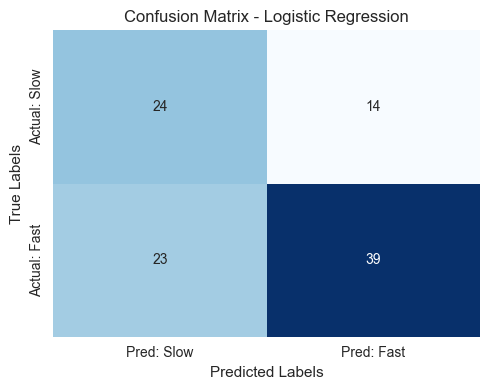


SUPPORT VECTOR MACHINE (SVM) MODEL
SVM Test Accuracy: 0.650, F1: 0.634


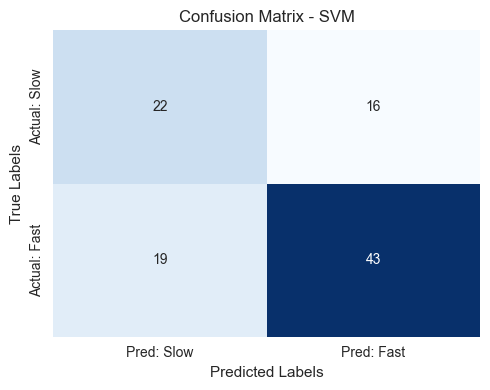


DECISION TREE CLASSIFIER
Decision Tree Test Accuracy: 0.560, F1: 0.542


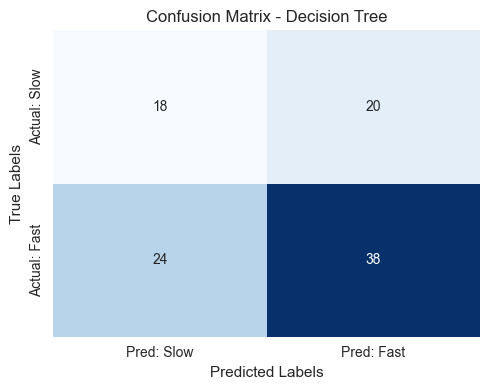


K-NEAREST NEIGHBORS (KNN)
KNN Test Accuracy: 0.590, F1: 0.516


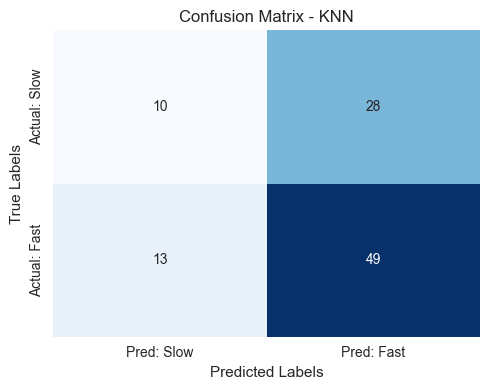


RANDOM FOREST CLASSIFIER
Random Forest Test Accuracy: 0.670, F1: 0.603


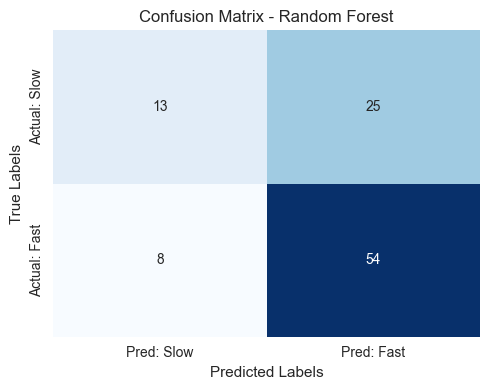


XGBOOST CLASSIFIER
XGBoost Test Accuracy: 0.670, F1: 0.644


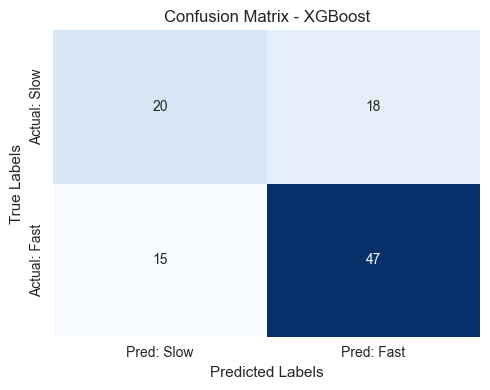


GRADIENT BOOSTING CLASSIFIER
Gradient Boosting Test Accuracy: 0.650, F1: 0.601


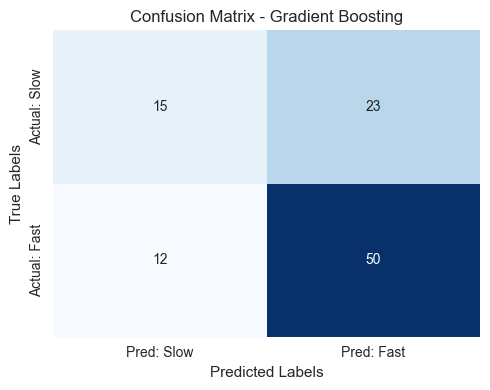


GAUSSIAN NAIVE BAYES
Naive Bayes Test Accuracy: 0.390, F1: 0.293


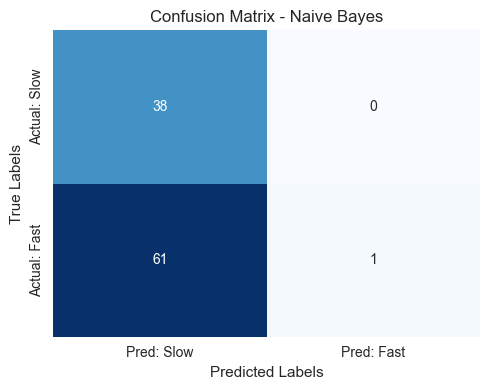


All models trained, evaluated, and confusion matrices displayed successfully!


In [24]:
# ===================== CONFUSION MATRIX FUNCTION =====================
def plot_confusion_matrix(y_true, y_pred, model_name):
    """
    Display confusion matrix heatmap for classification models.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: Slow', 'Pred: Fast'],
                yticklabels=['Actual: Slow', 'Actual: Fast'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.tight_layout()
    plt.show()


# ===================== BASELINE LOGISTIC REGRESSION =====================
print("BASELINE LOGISTIC REGRESSION MODEL")

baseline_model = LogisticRegression(
    random_state=234,
    max_iter=100,
    class_weight='balanced'
)
baseline_model.fit(X_train, y_train)

y_train_pred = baseline_model.predict(X_train)
y_val_pred = baseline_model.predict(X_val)
y_test_pred = baseline_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_bal_acc = balanced_accuracy_score(y_train, y_train_pred)
val_bal_acc = balanced_accuracy_score(y_val, y_val_pred)
test_bal_acc = balanced_accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred, average='macro')
val_f1 = f1_score(y_val, y_val_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

print(f"Training - Accuracy: {train_accuracy:.3f}, Balanced Acc: {train_bal_acc:.3f}, F1: {train_f1:.3f}")
print(f"Validation - Accuracy: {val_accuracy:.3f}, Balanced Acc: {val_bal_acc:.3f}, F1: {val_f1:.3f}")
print(f"Test - Accuracy: {test_accuracy:.3f}, Balanced Acc: {test_bal_acc:.3f}, F1: {test_f1:.3f}")

plot_confusion_matrix(y_test, y_test_pred, "Logistic Regression")


# ===================== SVM =====================
print("\nSUPPORT VECTOR MACHINE (SVM) MODEL")
svm_model = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=234)
svm_model.fit(X_train, y_train)

y_test_pred = svm_model.predict(X_test)

print(f"SVM Test Accuracy: {accuracy_score(y_test, y_test_pred):.3f}, F1: {f1_score(y_test, y_test_pred, average='macro'):.3f}")
plot_confusion_matrix(y_test, y_test_pred, "SVM")


# ===================== DECISION TREE =====================
print("\nDECISION TREE CLASSIFIER")
tree_model = DecisionTreeClassifier(random_state=234, class_weight='balanced', max_depth=10)
tree_model.fit(X_train, y_train)

y_test_pred = tree_model.predict(X_test)

print(f"Decision Tree Test Accuracy: {accuracy_score(y_test, y_test_pred):.3f}, F1: {f1_score(y_test, y_test_pred, average='macro'):.3f}")
plot_confusion_matrix(y_test, y_test_pred, "Decision Tree")


# ===================== KNN =====================
print("\nK-NEAREST NEIGHBORS (KNN)")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_test_pred = knn_model.predict(X_test)

print(f"KNN Test Accuracy: {accuracy_score(y_test, y_test_pred):.3f}, F1: {f1_score(y_test, y_test_pred, average='macro'):.3f}")
plot_confusion_matrix(y_test, y_test_pred, "KNN")


# ===================== RANDOM FOREST =====================
print("\nRANDOM FOREST CLASSIFIER")
rf_model = RandomForestClassifier(random_state=234, class_weight='balanced', n_estimators=150)
rf_model.fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)

print(f"Random Forest Test Accuracy: {accuracy_score(y_test, y_test_pred):.3f}, F1: {f1_score(y_test, y_test_pred, average='macro'):.3f}")
plot_confusion_matrix(y_test, y_test_pred, "Random Forest")


# ===================== XGBOOST =====================
print("\nXGBOOST CLASSIFIER")
xgb_model = XGBClassifier(random_state=234, eval_metric='logloss', use_label_encoder=False)
xgb_model.fit(X_train, y_train)

y_test_pred = xgb_model.predict(X_test)

print(f"XGBoost Test Accuracy: {accuracy_score(y_test, y_test_pred):.3f}, F1: {f1_score(y_test, y_test_pred, average='macro'):.3f}")
plot_confusion_matrix(y_test, y_test_pred, "XGBoost")


# ===================== GRADIENT BOOSTING =====================
print("\nGRADIENT BOOSTING CLASSIFIER")
gb_model = GradientBoostingClassifier(random_state=234)
gb_model.fit(X_train, y_train)

y_test_pred = gb_model.predict(X_test)

print(f"Gradient Boosting Test Accuracy: {accuracy_score(y_test, y_test_pred):.3f}, F1: {f1_score(y_test, y_test_pred, average='macro'):.3f}")
plot_confusion_matrix(y_test, y_test_pred, "Gradient Boosting")


# ===================== NAIVE BAYES =====================
print("\nGAUSSIAN NAIVE BAYES")
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_test_pred = nb_model.predict(X_test)

print(f"Naive Bayes Test Accuracy: {accuracy_score(y_test, y_test_pred):.3f}, F1: {f1_score(y_test, y_test_pred, average='macro'):.3f}")
plot_confusion_matrix(y_test, y_test_pred, "Naive Bayes")


print("\nAll models trained, evaluated, and confusion matrices displayed successfully!")



Model Performance Comparison (Test Set):
                 Model  Accuracy  Balanced Accuracy  F1 Score
5              XGBoost      0.67           0.642190  0.644051
1                  SVM      0.65           0.636248  0.633853
0  Logistic Regression      0.63           0.630306  0.621483
4        Random Forest      0.67           0.606537  0.603318
6    Gradient Boosting      0.65           0.600594  0.601140
2        Decision Tree      0.56           0.543294  0.541667
3                  KNN      0.59           0.526740  0.516452
7          Naive Bayes      0.39           0.508065  0.293245

Best Model Selected: XGBoost
Test F1 Score: 0.644

Detailed Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        38
           1       0.72      0.76      0.74        62

    accuracy                           0.67       100
   macro avg       0.65      0.64      0.64       100
weighted avg       0.67      0.6

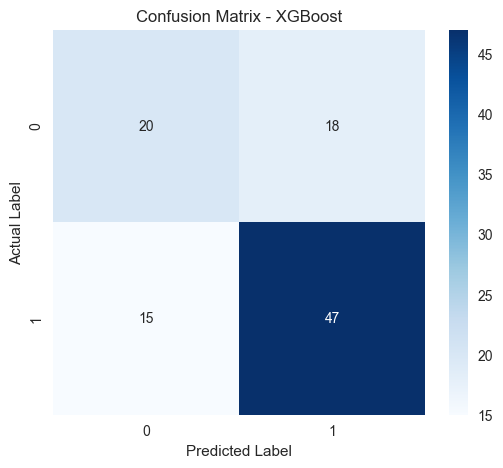


Per-class Accuracy for XGBoost:
Class 0: 0.526 (38 samples)
Class 1: 0.758 (62 samples)


In [25]:
# ==============================
# Compare all models
# ==============================
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score

# Create a list of models and their objects
models = {
    "Logistic Regression": baseline_model,
    "SVM": svm_model,
    "Decision Tree": tree_model,
    "KNN": knn_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "Gradient Boosting": gb_model,
    "Naive Bayes": nb_model
}

# Store metrics for comparison
model_comparison = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    model_comparison.append({
        'Model': name,
        'Accuracy': acc,
        'Balanced Accuracy': bal_acc,
        'F1 Score': f1
    })

# Convert to DataFrame for easy comparison
comparison_df = pd.DataFrame(model_comparison).sort_values(by='F1 Score', ascending=False)
print("\nModel Performance Comparison (Test Set):")
print(comparison_df)

# ==============================
# Select Best Model
# ==============================
best_model_name = comparison_df.iloc[0]['Model']
best_model = models[best_model_name]
y_test_pred_best = best_model.predict(X_test)

print(f"\nBest Model Selected: {best_model_name}")
print(f"Test F1 Score: {comparison_df.iloc[0]['F1 Score']:.3f}")

# ==============================
# Detailed Evaluation of Best Model
# ==============================
from sklearn.metrics import classification_report, confusion_matrix

print(f"\nDetailed Classification Report for {best_model_name}:")
print("="*60)
print(classification_report(y_test, y_test_pred_best))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_best)
print(f"\nConfusion Matrix for {best_model_name}:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# Per-class accuracy
print(f"\nPer-class Accuracy for {best_model_name}:")
for cls in sorted(y_test.unique()):
    mask = y_test == cls
    class_acc = accuracy_score(y_test[mask], y_test_pred_best[mask])
    print(f"Class {cls}: {class_acc:.3f} ({mask.sum()} samples)")



Running RandomizedSearchCV for XGBoost...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters for XGBoost: {'subsample': 0.8, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best CV F1-score: 0.584

Detailed Evaluation of Tuned Best Model: XGBoost
              precision    recall  f1-score   support

           0       0.62      0.53      0.57        38
           1       0.74      0.81      0.77        62

    accuracy                           0.70       100
   macro avg       0.68      0.67      0.67       100
weighted avg       0.69      0.70      0.69       100



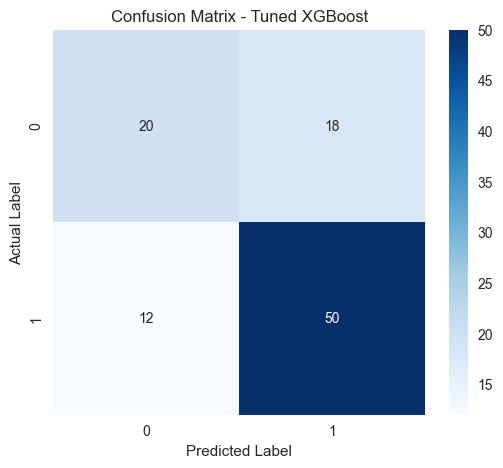


Model Performance Comparison (Test F1):
                 Model  F1 Score
5              XGBoost  0.644051
1                  SVM  0.633853
0  Logistic Regression  0.621483
4        Random Forest  0.603318
6    Gradient Boosting  0.601140
2        Decision Tree  0.541667
3                  KNN  0.516452
7          Naive Bayes  0.293245

Best model selected: XGBoost with F1 Score: 0.644

Running RandomizedSearchCV for XGBoost...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters for XGBoost: {'subsample': 0.8, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best CV F1-score: 0.584

Detailed Evaluation of Tuned Best Model: XGBoost
              precision    recall  f1-score   support

           0       0.62      0.53      0.57        38
           1       0.74      0.81      0.77        62

    accuracy                           0.70       100
   macro avg       0.68      0.67      0.67       100
weighted avg       0.69

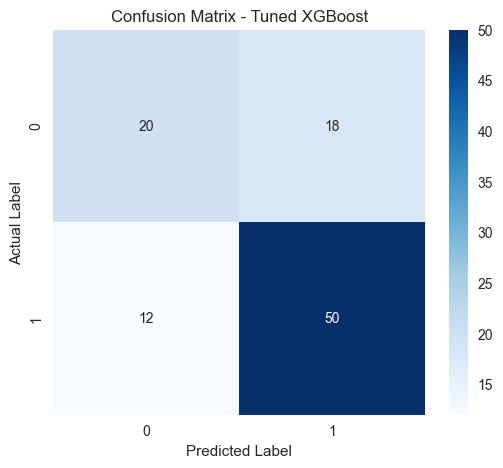

In [29]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# # ==============================
# # Compare all models (already trained)
# # ==============================
# models = {
#     "Logistic Regression": baseline_model,
#     "SVM": svm_model,
#     "Decision Tree": tree_model,
#     "KNN": knn_model,
#     "Random Forest": rf_model,
#     "XGBoost": xgb_model,
#     "Gradient Boosting": gb_model,
#     "Naive Bayes": nb_model
# }

# # Collect test metrics
# model_comparison = []
# for name, model in models.items():
#     y_pred = model.predict(X_test)
#     f1 = f1_score(y_test, y_pred, average='macro')
#     model_comparison.append({'Model': name, 'F1 Score': f1})

# comparison_df = pd.DataFrame(model_comparison).sort_values(by='F1 Score', ascending=False)
# print("\nModel Performance Comparison (Test F1):")
# print(comparison_df)

# # Select best model
# best_model_name = comparison_df.iloc[0]['Model']
# best_model = models[best_model_name]
# print(f"\nBest model selected: {best_model_name} with F1 Score: {comparison_df.iloc[0]['F1 Score']:.3f}")

# ==============================
# RandomizedSearchCV on best model
# ==============================
# Define hyperparameter grids for supported models
param_grids = {
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
        'kernel': ['rbf', 'poly', 'sigmoid']
    },
    'Random Forest': {
        'n_estimators': [100, 150, 200],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None],
        'class_weight': ['balanced', 'balanced_subsample']
    },
    'XGBoost': {
        'n_estimators': [100, 150, 200],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7, 10],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 150, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.6, 0.8, 1.0],
        'min_samples_split': [2, 5, 10]
    }
}

# Only tune models that support hyperparameters
if best_model_name in param_grids:
    print(f"\nRunning RandomizedSearchCV for {best_model_name}...")
    rs = RandomizedSearchCV(
        estimator=best_model,
        param_distributions=param_grids[best_model_name],
        n_iter=20,
        scoring='f1_macro',
        cv=5,
        verbose=2,
        random_state=234,
        n_jobs=-1
    )
    rs.fit(X_train, y_train)
    
    best_model = rs.best_estimator_
    print(f"Best hyperparameters for {best_model_name}: {rs.best_params_}")
    print(f"Best CV F1-score: {rs.best_score_:.3f}")
else:
    print(f"{best_model_name} does not have hyperparameters to tune with RandomizedSearchCV.")

# ==============================
# Evaluate Tuned Best Model
# ==============================
y_test_pred_best = best_model.predict(X_test)

print(f"\nDetailed Evaluation of Tuned Best Model: {best_model_name}")
print("="*60)
print(classification_report(y_test, y_test_pred_best))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_best)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))
plt.title(f'Confusion Matrix - Tuned {best_model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# ==============================
# Compare all models (already trained)
# ==============================
models = {
    "Logistic Regression": baseline_model,
    "SVM": svm_model,
    "Decision Tree": tree_model,
    "KNN": knn_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "Gradient Boosting": gb_model,
    "Naive Bayes": nb_model
}

# Collect test metrics
model_comparison = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    model_comparison.append({'Model': name, 'F1 Score': f1})

comparison_df = pd.DataFrame(model_comparison).sort_values(by='F1 Score', ascending=False)
print("\nModel Performance Comparison (Test F1):")
print(comparison_df)

# Select best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest model selected: {best_model_name} with F1 Score: {comparison_df.iloc[0]['F1 Score']:.3f}")

# ==============================
# RandomizedSearchCV on best model
# ==============================
# Define hyperparameter grids for supported models
param_grids = {
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
        'kernel': ['rbf', 'poly', 'sigmoid']
    },
    'Random Forest': {
        'n_estimators': [100, 150, 200],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None],
        'class_weight': ['balanced', 'balanced_subsample']
    },
    'XGBoost': {
        'n_estimators': [100, 150, 200],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7, 10],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 150, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.6, 0.8, 1.0],
        'min_samples_split': [2, 5, 10]
    }
}

# Only tune models that support hyperparameters
if best_model_name in param_grids:
    print(f"\nRunning RandomizedSearchCV for {best_model_name}...")
    rs = RandomizedSearchCV(
        estimator=best_model,
        param_distributions=param_grids[best_model_name],
        n_iter=20,
        scoring='f1_macro',
        cv=5,
        verbose=2,
        random_state=234,
        n_jobs=-1
    )
    rs.fit(X_train, y_train)
    
    best_model = rs.best_estimator_
    print(f"Best hyperparameters for {best_model_name}: {rs.best_params_}")
    print(f"Best CV F1-score: {rs.best_score_:.3f}")
else:
    print(f"{best_model_name} does not have hyperparameters to tune with RandomizedSearchCV.")

# ==============================
# Evaluate Tuned Best Model
# ==============================
y_test_pred_best = best_model.predict(X_test)

print(f"\nDetailed Evaluation of Tuned Best Model: {best_model_name}")
print("="*60)
print(classification_report(y_test, y_test_pred_best))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_best)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))
plt.title(f'Confusion Matrix - Tuned {best_model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


TP = 50 → Class 1 (positive class) is being correctly predicted most of the time.

TN = 20 → Class 0 (negative class) is only correctly predicted half the time (20 out of 38).

FP = 18 → Many class 0 instances are being misclassified as class 1 (~47% of class 0).

FN = 15 → Some class 1 instances are being misclassified as class 0 (~24% of class 1).

Observations:

The model is better at predicting class 1 (probably Fast or “Sold).

Class 0 is less accurately predicted — 18 out of 38 instances were misclassified.

Overall accuracy ~ 67%, which may indicate the model can be improved.

In [30]:
import joblib
import json
import os

# ===================== SAVE BEST MODEL AND RESULTS =====================

print("\nSAVING BEST MODEL AND RESULTS")

# Example: Suppose you already determined best_model_name and best_model
# (e.g. best_model_name = 'XGBoost'; best_model = xgb_model)

# Create a results folder
os.makedirs("model_results", exist_ok=True)

# Save the model using joblib
model_path = f"model_results/best_model_{best_model_name.replace(' ', '_')}.pkl"
joblib.dump(best_model, model_path)

print(f"Best model '{best_model_name}' saved to: {model_path}")

# Collect performance results
best_model_results = {
    "model_name": best_model_name,
    "test_accuracy": accuracy_score(y_test, y_test_pred_best),
    "test_balanced_accuracy": balanced_accuracy_score(y_test, y_test_pred_best),
    "test_f1_macro": f1_score(y_test, y_test_pred_best, average='macro'),
    "confusion_matrix": confusion_matrix(y_test, y_test_pred_best).tolist(),  # convert to list for JSON
}

# Save results to a JSON file
results_path = f"model_results/{best_model_name.replace(' ', '_')}_results.json"
with open(results_path, "w") as f:
    json.dump(best_model_results, f, indent=4)

print(f"Model evaluation metrics saved to: {results_path}")

# Display summary
print("\nBest Model Summary:")
print("=" * 50)
print(json.dumps(best_model_results, indent=4))



SAVING BEST MODEL AND RESULTS
Best model 'XGBoost' saved to: model_results/best_model_XGBoost.pkl
Model evaluation metrics saved to: model_results/XGBoost_results.json

Best Model Summary:
{
    "model_name": "XGBoost",
    "test_accuracy": 0.7,
    "test_balanced_accuracy": 0.666383701188455,
    "test_f1_macro": 0.6703296703296704,
    "confusion_matrix": [
        [
            20,
            18
        ],
        [
            12,
            50
        ]
    ]
}


In [31]:
# Save column names for future use in API
joblib.dump(X_train.columns.tolist(), "feature_columns.pkl")
print("Feature columns saved successfully!")


Feature columns saved successfully!
